In [82]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
data = pd.read_csv("housing.csv")

In [84]:
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [86]:
## drop total bedroom variable as it has many nan values


In [87]:
data.dropna(inplace=True)


In [88]:
##all good

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [90]:
## getting the train test split to later check how ouur model performs on unseen data


In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X = data.drop(['median_house_value'], axis=1)
y=data['median_house_value']

In [93]:
y


0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [94]:
## reserve 20% of data for testing


In [95]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2)

In [96]:
## but first re join the split for further pre processing and visualization of data


In [97]:

train_data=X_train.join(y_train)



array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

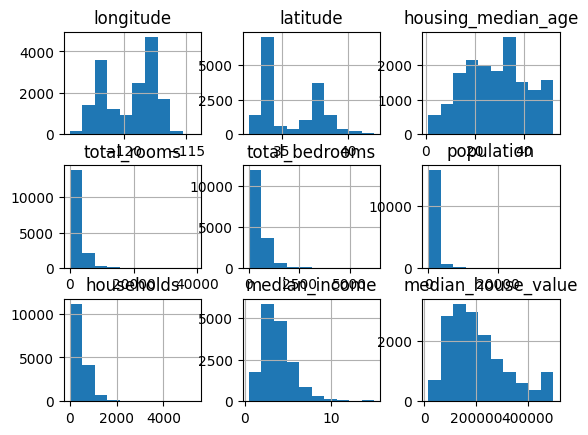

In [98]:
train_data.hist()


<Axes: >

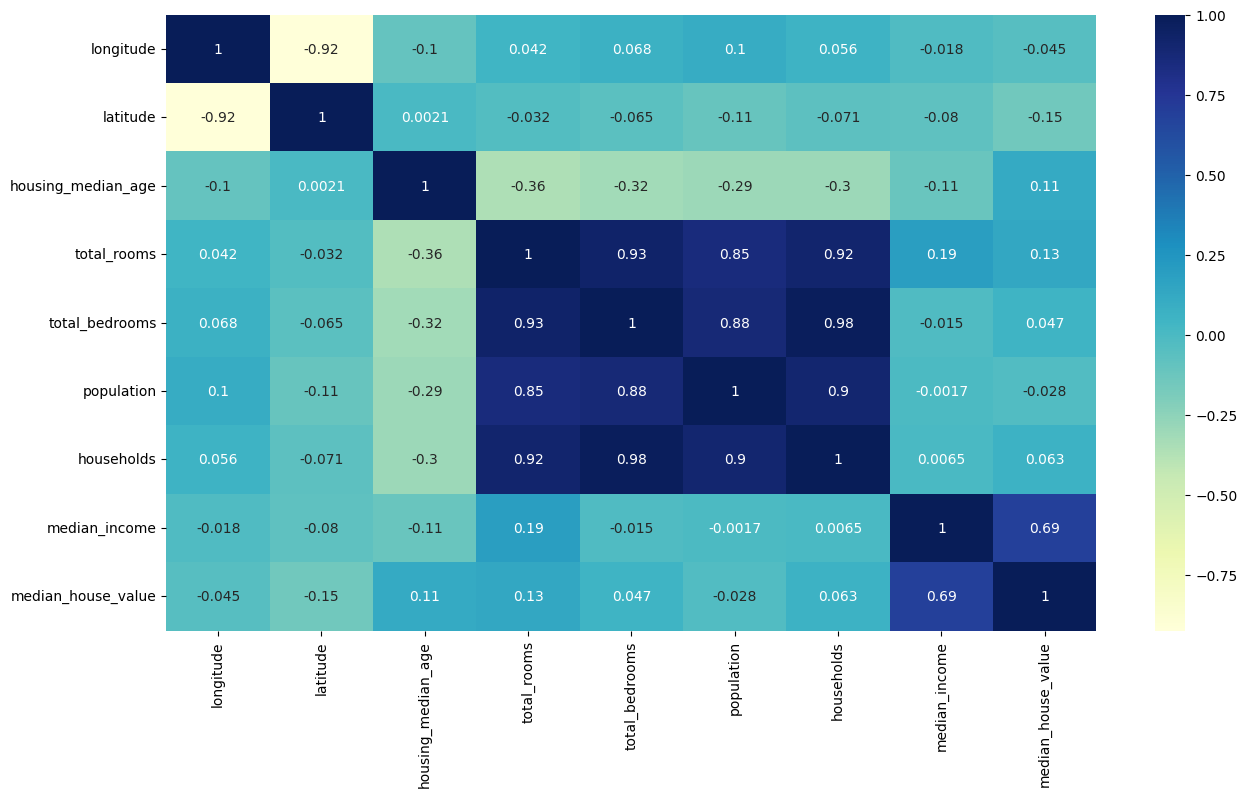

In [99]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")
#see the median income feature, that is v imp as its showing a high correlation witht the median house value


In [100]:
#feature scaling- as most of them are leaning towards an axis, right skewed etc
# take log

In [101]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

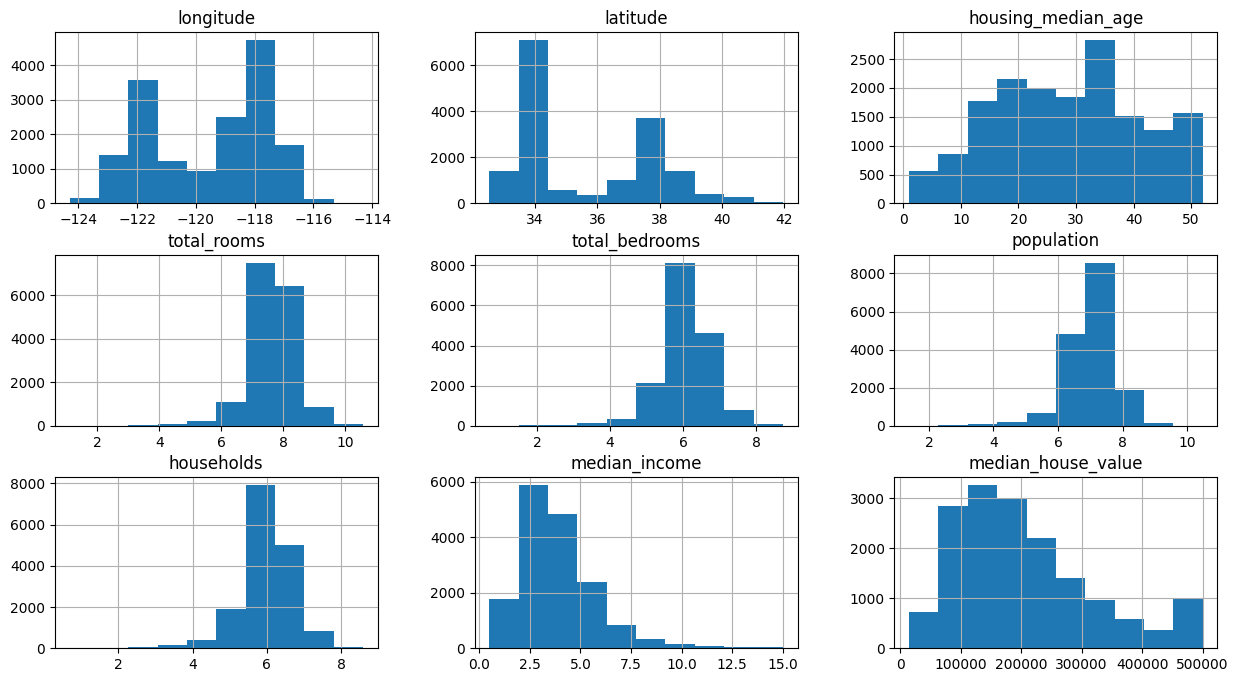

In [102]:
train_data.hist(figsize=(15,8))
##now the distribiutiojn and crves in graphs look normal

In [103]:
##doing one hot encoding in pnadas for ocean proximity because thats an important factor to decide the price

In [133]:
train_data.ocean_proximity.value_counts()

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [105]:
##converted to multiple feastures successfuly
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [106]:
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
680,-122.15,37.68,30.0,7.724005,6.095825,6.835185,5.950643,4.2841,213400.0,False,False,False,True,False
19719,-121.74,39.15,20.0,7.741968,6.023448,7.095064,5.991465,2.8000,71200.0,False,True,False,False,False
18173,-122.01,37.36,25.0,7.936303,6.063785,7.145196,6.056784,6.6329,349000.0,True,False,False,False,False
4278,-118.31,34.09,28.0,6.580639,5.590987,6.793466,5.583496,1.8977,100000.0,True,False,False,False,False
16742,-122.45,37.70,46.0,7.693482,6.214608,7.503841,6.194405,4.0125,230100.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10611,-117.79,33.68,9.0,7.398786,5.690359,6.834109,5.697093,5.7858,265900.0,True,False,False,False,False
18655,-121.97,36.98,17.0,7.942362,6.210600,7.198931,6.169611,3.7083,252400.0,False,False,False,False,True
4136,-118.18,34.12,52.0,6.986566,5.743003,6.807935,5.648974,1.9219,165100.0,True,False,False,False,False
14771,-117.08,32.57,18.0,7.698029,6.300786,7.572503,6.210600,2.2500,103200.0,False,False,False,False,True


<Axes: >

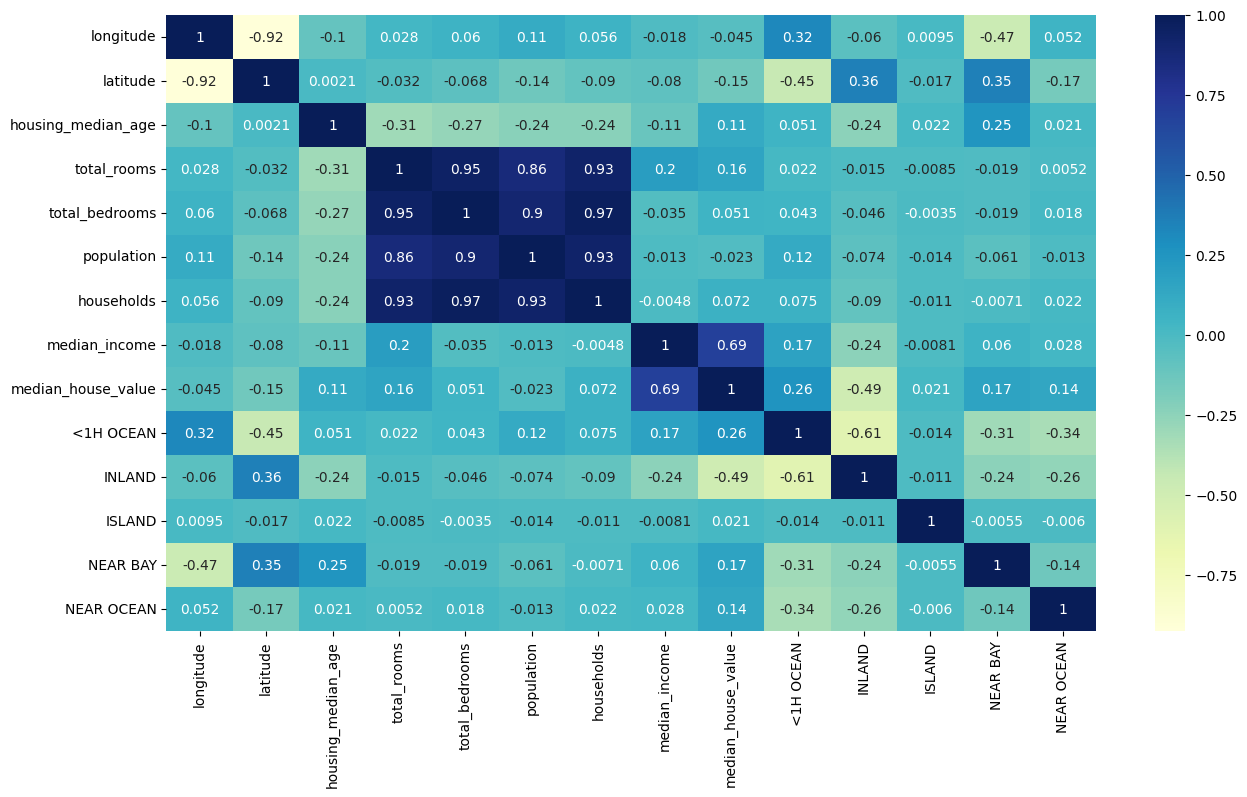

In [107]:
##SEE HEATMAP to understand new correlations
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")
## see that if in land you pay less , if near ocean yoy pay more

<Axes: xlabel='latitude', ylabel='longitude'>

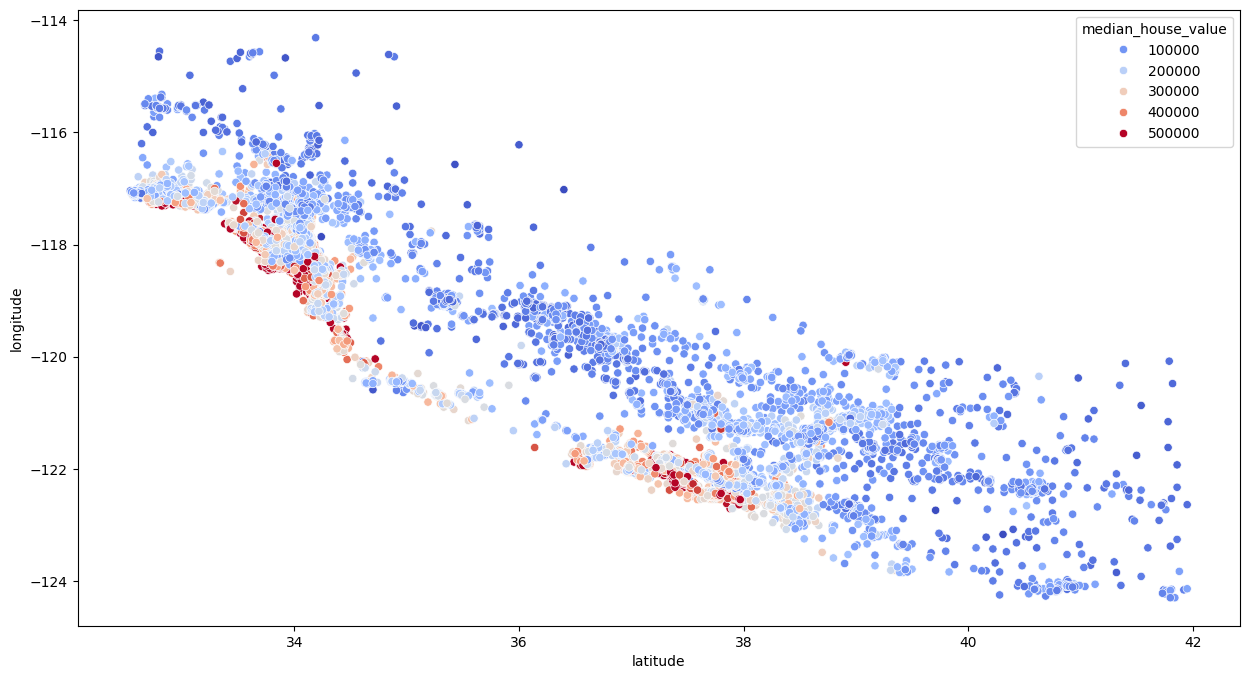

In [108]:
##visualize again
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")
##red dots represetning expensive houses near the ocean and vice versa

In [109]:
##Feature Engineering

In [110]:
##for the two features below as they have important correlation with price
train_data['bedroom_ratio']= train_data['total_bedrooms']/ train_data['total_rooms']
train_data['household_rooms']= train_data['total_rooms']/ train_data['households']


<Axes: >

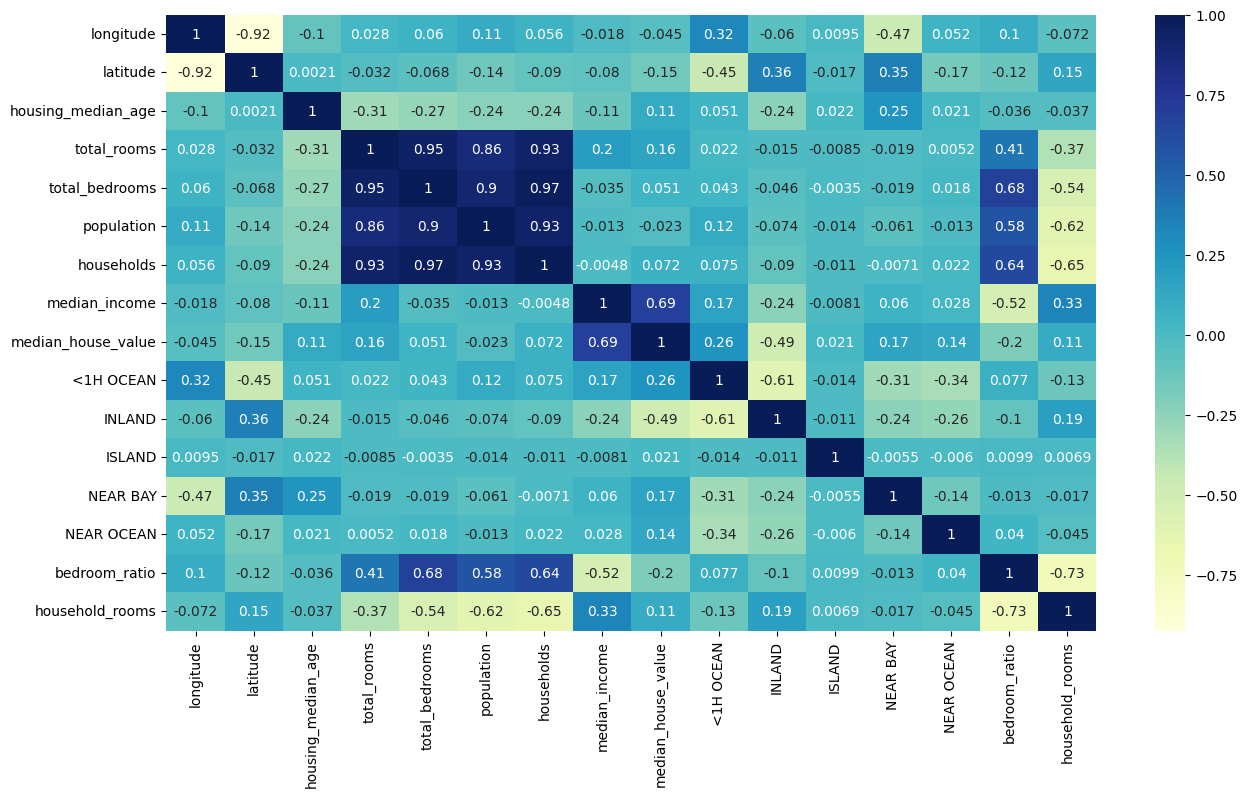

In [111]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [112]:
##implementing the linear regression model

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

##split the data into x and y for the model
X_train, y_train= train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
##scale for better results
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [132]:
##pasting all the previous test train split code here to rejoin 
test_data=X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio']= test_data['total_bedrooms']/ test_data['total_rooms']
test_data['household_rooms']= test_data['total_rooms']/ test_data['households']




AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [134]:
X_test, y_test= test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [136]:
X_test_s= scaler.transform(X_test)

In [137]:
reg.score(X_test, y_test)

C:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-2225.1266850800994